<center>
<font size="4">
    <b>
    
Assessing the Safety for Human Repopulation of Fukushima Using Wild Boar as a Mammalian Proxy:<br>
Dose estimates and telomere length, dicentrics, and cortisol
    </b>
</font>
</center>

### Background
---

In March 2011, the Fukushima Daiichi nuclear disaster occurred in the Fukushima prefecture of Japan, after the Tohoku earthquake and tsunami, where three nuckear meltdowns and three hydrogen explosions released radiation into the surrounding environment. This nuclear event was the most serious since the Chernobyl accident of 1986. Today, it remains unknown whether areas contaminated by the Fukushima Daiichi Nuclear Disaster are safe for human repopulation. To provide an assessment of the area's safety for human habitation, we've trapped >200 wild boar roaming the contaminated areas to serve mammalian proxies for humans, modeling exposure to radiation. By measuring and analyzing number of biological metrics on these boar, we can determine their levels of radiation exposure and determine to what extent, if any, this exposure has compromised their health. In doing so, we assess the potential health risks humans may encounter when repopulating the areas.

The biomarkers we'll evaluate for these boar include:

+ Telomere Length of blood & T-cells (measured by FISH & qPCR) &nbsp;   
+ Cortisol levels &nbsp;   
+ Dicentric chromosomes &nbsp;  
+ External / internal doses &nbsp;  
+ Psuedo-pelger Hewitt Anomalies &nbsp;  

Our collected data exists in a wide variety of locations and data formats. Our first tasks are to access, clean, and merge these data into managable dataframe objects.

### Cleaning the Data

Notebook:
[Extracting, Cleaning and Merging the Boar Data](01_Fukushima_Project_Data_Extraction_and_Cleaning.ipynb), in this notebook the following types of data are extracted, cleaned, merged (various combinations) and properly formatted into pandas dataframes for analyses:

+ boar cortisol measurements
+ boar w/ ~5000 individual telomere length measurements (teloFISH)
+ boar w/ qPCR telomere length measurements
+ boar dicentric frequencies (~100 cells per boar)
+ ~12 types of new radiation dose estimates for boar
+ boar pseudo-pelger huet anomaly data
+ some telemere length, dose, age & sex data on snakes

### Visualizing the Data

Notebook:
[Exploratory data analysis](02_Fukushima_Project_Visualization_and_Statistics.ipynb), contains extensive exploratory data analysis.  
  
  In this notebook we'll explore some major findings in the data here.

In [54]:
# common data handling modules
import numpy as np
import pandas as pd

# custom module for handling telomere length data
import fukushima_telomere_methods as f_tm

# common plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# setting all graphs to have a darkgrid style w/ black edges for axes elements
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})

%matplotlib inline

## Results 
--- 

### Boar's Radiation exposure vs telomere length by teloFISH 

First we'll explore if the boar's radiation exposure relates with telomere length (by teloFISH) using data visualizations with the python library seaborn, a data visualization tool built upon the python matplotlib library. Our dataset has many estimates for radiation exposure, here we'll explore only the standard ones: internal, external, and total life-time dose.

In [3]:
# reading in a dataframe holding telomere FISH & radiation exposure data
teloFISH_radiation_exposure = pd.read_csv('../excel data/graphing/merge_kelly_teloFISH_exposure.csv')

# visualizing the top two rows & printing the dataframe's shape
display(teloFISH_radiation_exposure.head(3))
print(teloFISH_radiation_exposure.shape)

,Sample ID,teloFISH data,teloFISH means,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137)
0,1606103,"[0.9942074384031242, 0.33512610283251376, 0.16...",0.439557,Male,29,0.151088,0.494718,0.736103,0.808553,2.410267,3.218820,68.208,4.719123,92.568,71.426820,95.786820,3.645807
1,1607205,"[0.26251544721880243, 0.33512610283251376, 0.3...",0.452469,Male,7,0.009513,0.028632,0.011986,0.012258,0.036077,0.048335,0.882,5.480147,1.260,0.930335,1.308335,0.738145
2,1607221,"[0.7707900365147816, 0.357467843021348, 0.2681...",0.533217,Male,7,0.628241,2.033350,0.791583,0.810176,2.562021,3.372197,17.640,19.116765,23.940,21.012197,27.312197,5.661591


(35, 17)


In [4]:
# columns we'll graph telomere length by teloFISH against 
y_cols_to_graph = [
'INTERNAL Life time dose, mGy Cs 134+137',
'EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137',
'Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)']

Our plots will relate three measurements of radiation exposure to mean telomere length in boar. We'll split up the data per sex to examine sex-based differences. The solid lines represent a linear regression between the variables & the shaded color is line's confidence interval. 

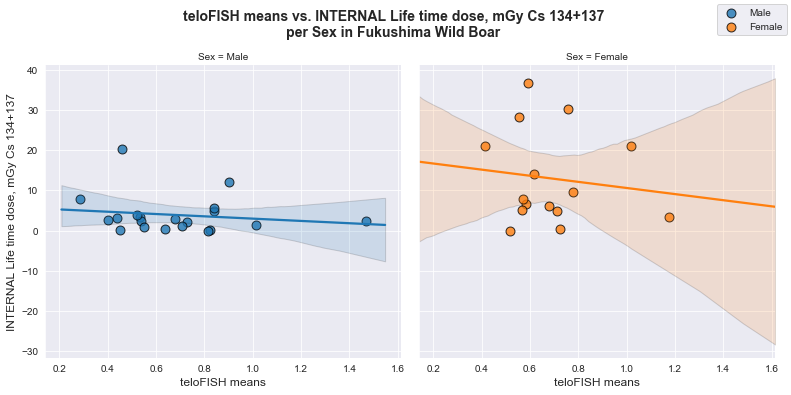

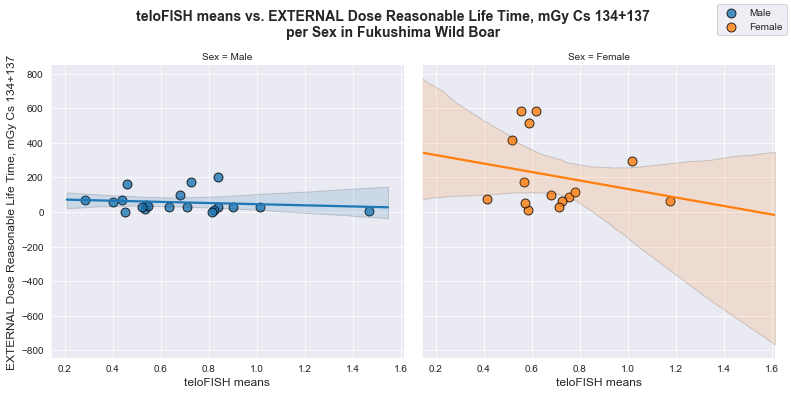

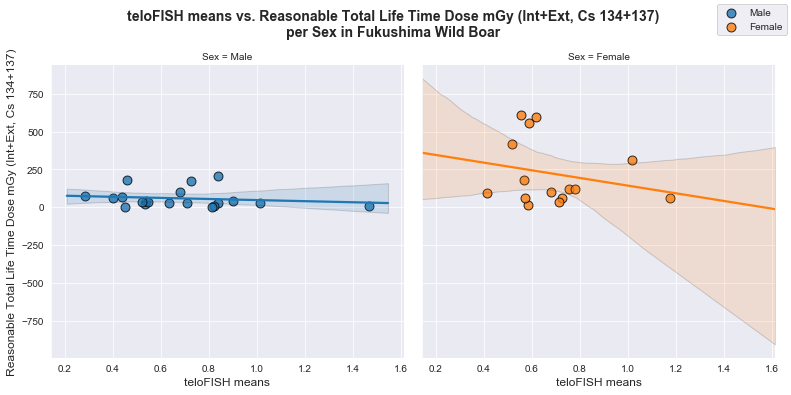

In [6]:
x = 'teloFISH means'
data=teloFISH_radiation_exposure
hue='Sex'
col='Sex'

def multiple_linear_regression_graphs_between_variables(x=None, y_cols_to_graph=None,
                                                        data=None, hue=None, col=None,
                                                       hue_order=None, col_order=None):

    for y in y_cols_to_graph:

        ax=sns.lmplot(x=x, y=y, hue=hue, col=col, data=data,
        height=5.5, aspect=1, scatter_kws={"s": 80, "edgecolor":'black'},
        hue_order=hue_order, col_order=col_order)

        fig = ax.fig 
        fig.suptitle(f'{x} vs. {y}\nper Sex in Fukushima Wild Boar', fontsize=14, weight='bold')
        ax.set_xlabels(x, fontsize=12)
        ax.set_ylabels(y, fontsize=12)
        plt.subplots_adjust(top=0.84)
        fig.legend(fontsize='medium')
    #     ax.savefig(f"../graphs/Mean Telomere Length by FISH vs {name_current}.png")

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y_cols_to_graph,
                                                    data=data, hue=hue, col=col)

By every measure, the linear regression between telomere length & radiation exposure is nearly 0, meaning no relationship. Female boar may have a slight negative relationship between telomere length and radiation exposure, i.e shorter telomeres w/ increasing dose. The trend is very weak, however.

Now let's see see if our boar have serious chromosomal damage, dicentrics, as a function of radiation exposure.

### Boar's Radiation exposure vs. dicentrics

In [8]:
# loading data
dicentrics_exposure_df = pd.read_csv('../excel data/graphing/kelly_dicentrics_exposure_df.csv')

display(dicentrics_exposure_df.head(2))
print(dicentrics_exposure_df.shape)

,Sample ID,Sex,Age (weeks),INTERNAL uGy/h Cs-134,INTERNAL uGy/h Cs-137,"INTERNAL Life time dose, mGy 134",Integrated INTERNAL LIFE-TIME dose mGy Cs134,"INTERNAL Life time dose, mGy 137","INTERNAL Life time dose, mGy Cs 134+137","EXTERNAL Dose Reasonable Life Time, mGy Cs 134+137",% of INTERNAL to EXTERNAL dose,"EXTERNAL Dose Maximum Life Time, mGy (134+137)","Reasonable Total Life Time Dose mGy (Int+Ext, Cs 134+137)","Maximum Total Life Time Dose mGy (Int+Ext,134+137)",Dose rate (uGy/h) at time of capture (Int+Ext; 134+137),Average Dicentrics per cell
0,1606101,Male,33-39,0.09918634500000001,0.307031,0.59987901456,0.672739,1.856921,2.529660,57.456,4.402778,57.456,59.985660,59.985660,7.406217,0.04
1,1606102,Female,26,0.17109145,0.568404,0.7473274536,0.812612,2.482790,3.295402,61.152,5.388871,82.992,64.447402,86.287402,3.739496,0.00


(37, 16)


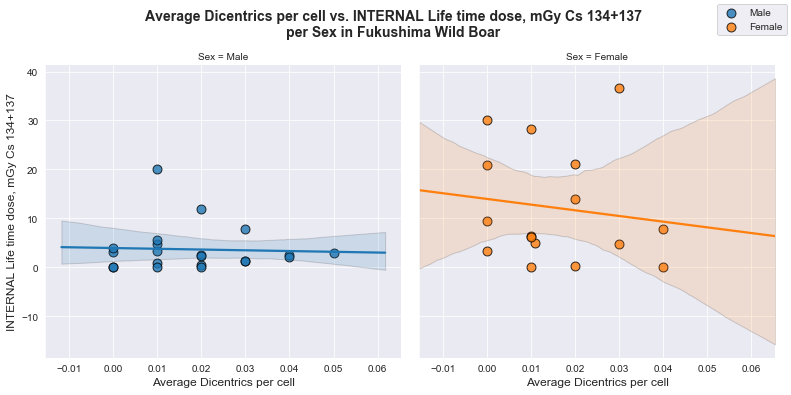

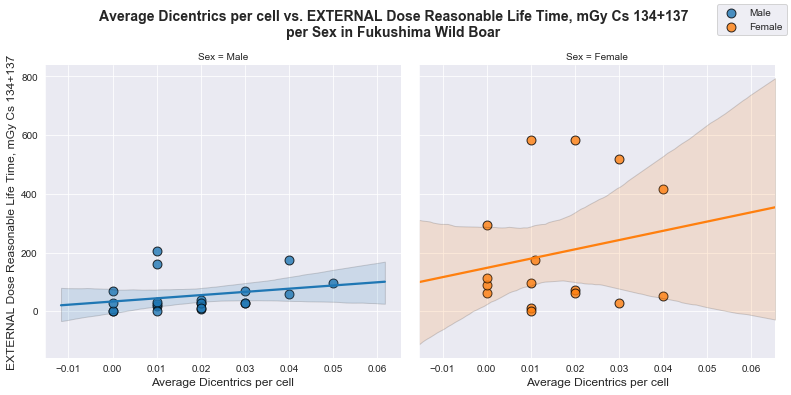

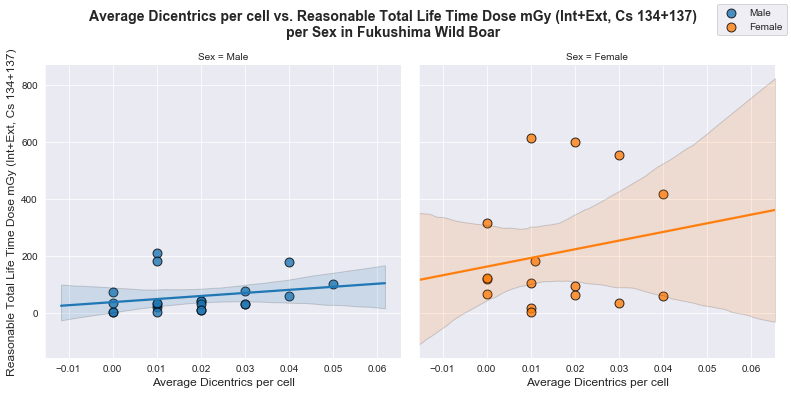

In [9]:
x='Average Dicentrics per cell'
data = dicentrics_exposure_df
hue='Sex'
col='Sex'

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y_cols_to_graph,
                                                    data=data, hue=hue, col=col)

A strong relationship is not observed between these doses of radiation and frequency of dicentrics (~100 cells scored per boar). The radiation exposure for the boar in our data set is, relatively speaking, extremely low and importantly, chronic rather than acute. At most, we see a weak positive relationship between dicentrics frequency and dose; which is expected. This is more prominent in external rather than internal dose.

### Boar's Radiation exposure vs. cortisol

It may be that while these low doses of radiation exposure do not markedly affect telomere length or dicentrics, it may still exert a stressor effect on the boar. Let's examine whether that's the case using cortisol, a marker of stress.

In [25]:
# reading in radiation/cortisol data
merge_kelly_cortisol_exposure = pd.read_csv('../excel data/graphing/merge_kelly_cortisol_exposure.csv')
merge_kelly_cortisol_exposure.drop([6, ], axis=0, inplace=True)

In [26]:
merge_kelly_cortisol_exposure.shape

(17, 17)

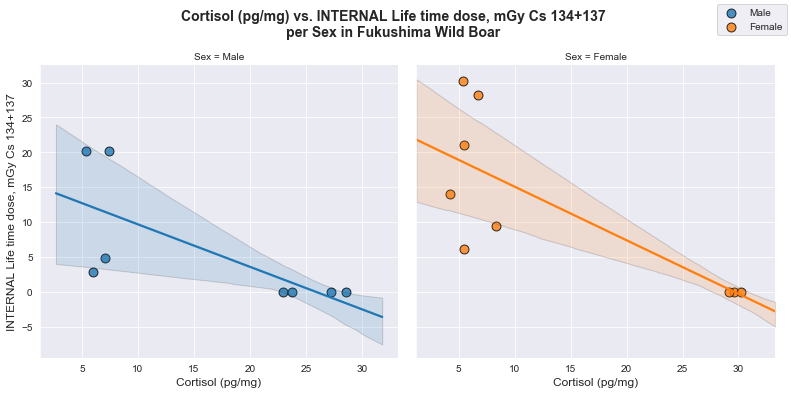

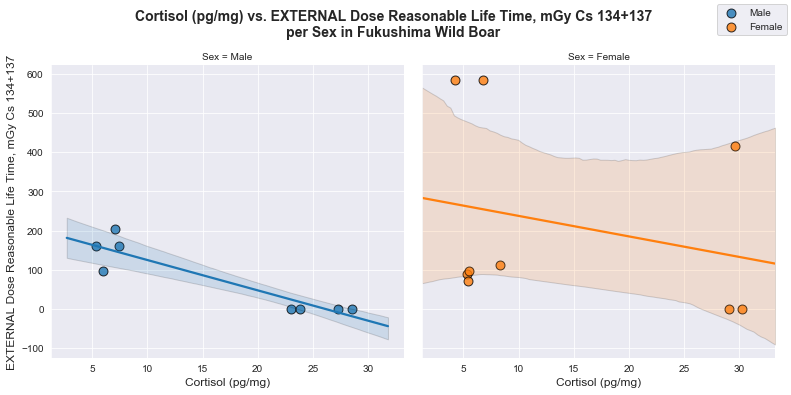

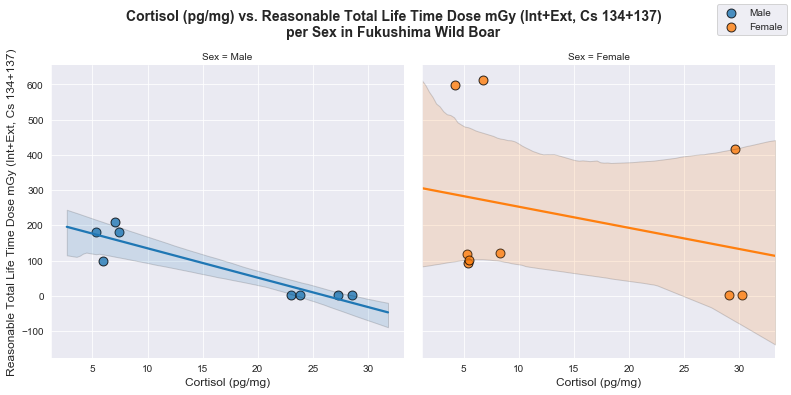

In [27]:
x='Cortisol (pg/mg)'
data = merge_kelly_cortisol_exposure
hue='Sex'
col='Sex'

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y_cols_to_graph,
                                                    data=data, hue=hue, col=col,
                                                   hue_order=['Male', 'Female',],
                                                   col_order=['Male', 'Female',])

The relationship between cortisol & dose for females seems to be perturbed based on the type of dose estimate (internal, external). Let's look at a few more types of internal dose estimates to clarify.

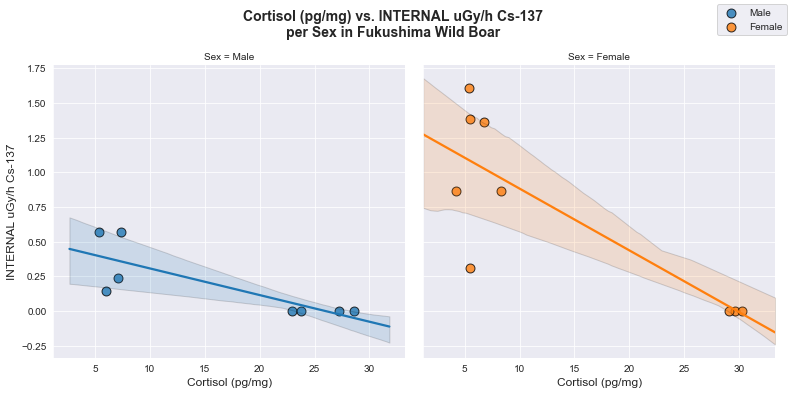

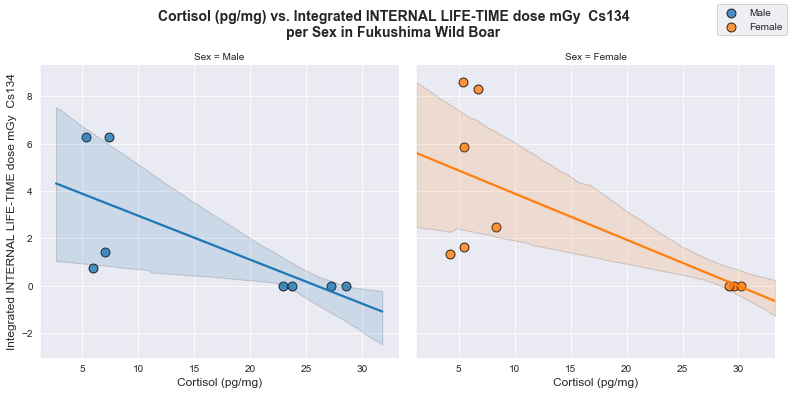

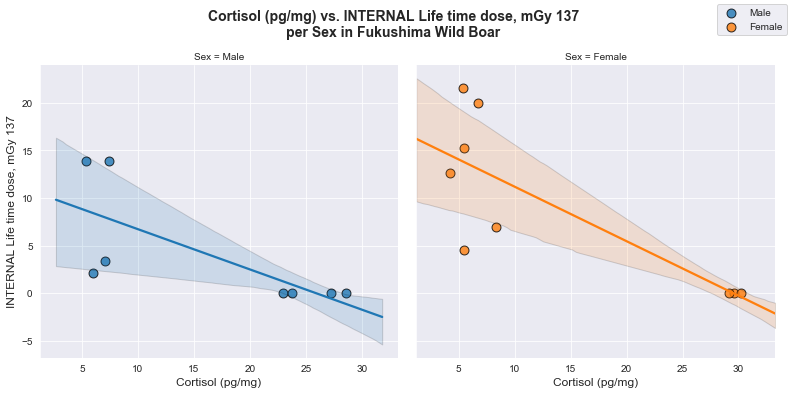

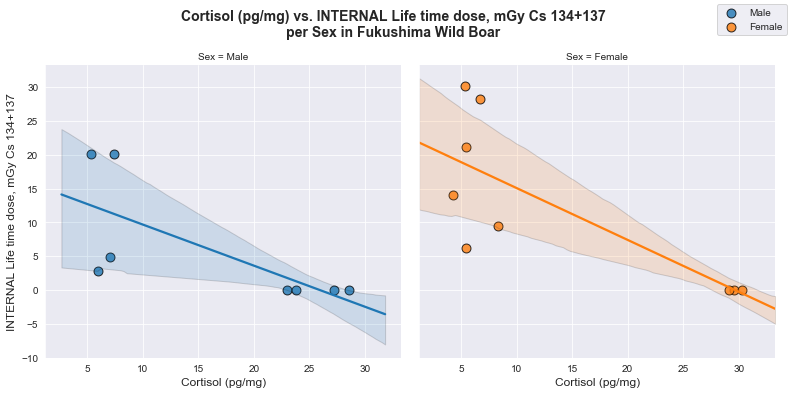

In [28]:
additional_cols = ['INTERNAL uGy/h Cs-137',
              'Integrated INTERNAL LIFE-TIME dose mGy  Cs134',
              'INTERNAL Life time dose, mGy 137',	
              'INTERNAL Life time dose, mGy Cs 134+137']

x='Cortisol (pg/mg)'
y=additional_cols
data = merge_kelly_cortisol_exposure
hue='Sex'
col='Sex'

multiple_linear_regression_graphs_between_variables(x=x, y_cols_to_graph=y,
                                                    data=data, hue=hue, col=col,
                                                   hue_order=['Male', 'Female',],
                                                   col_order=['Male', 'Female',])

### Discussion: Radiation exposure and telomere length, dicentrics, and cortisol (abbreviated 9/5/19)
---

The purpose of this investigation is to evaluate whether boar exposed to radiation in Fukushima are experiencing ill-health, to be answered by relating radiation exposure with various biomarkers. If we find strong relationships, then we propose that humans would experience similar detrimental effects. Thus far we've explored the relationships between radiation exposure (using various dose estimates) and telomere length, dicentrics, and cortisol with a distinction between male and female boar. Recall that we're measuring telomeres in T-cells, cells with exquisite sensitivty to radiation, and that telomeres are an integrated biomarker for health, where longer telomeres and shorter telomeres in general represent better and worse health respectively. Dicentric chromosomes are chromosome fusions which suggest (or could initiate) genomic instability, and cortisol is a generalized, well-accepted marker for stress.


**Telomeres:** The telomeric response to radiation is flat for males; no response. Females have a slight, extremely slight negative correlation between telomere length and radiation, which may well be an artifact of the data. On the whole, no response of telomeres to radiation. 

**Dicentrics:** The relationship between dicentrics and exposure tells a somewhat similar story. Here, the internal dose estimates show a flat relationship between exposure and dicentric frequency for males; however the external and reasonable lifetime dose show an extremely slight positive correlation. For females, the story here is similar with teloeres; a slight trend exists, but we must caution over interpretation, as the trend could be an artifact of the data's spread. 

**Cortisol:** Here the story is different between the sexes and types of dose calculation. For males, the relationship between cortisol and exposure is essentially the same regardless of the dose calculation: males with the *lowest* exposures (near zero) have the highest levels of cortisol, while the *highest* exposures have the lowest levels of cortisol. The most straightforward explanation is that wild boar with near zero exposures are living extremely close to humans and as a result, have more stress from the interactions, reflected in the cortisol; while boar living farthest away from humans, deep in the contaminated areas, have less stressful interactions and hence, lower cortisol. For females, the relationship between cortisol and exposure is identical to that of males, but not for all tests. The internal dose estimates possess a clear trend, while the external dose estimates possess no trend. This make be an artifact of our data, where we have a low number of female samples with cortisol and dose estimate data. On the whole it seems reasonable to say that females generally have a relationship between cortisol and dose that is similar to the males.

**Conclusions:** We've thus far looked at the relationship between radiation exposure, for various dose estimates, and three types of biomarkers in boar. On the whole, we do not see evidence for significant, detrimental expressions of radiation upon these biomarkers. On the contrary, boar living in the contaminated regions have lower levels of cortisol suggesting lower levels of stress. Thus far, we do not observe a strong relationship between dose and these biomarkers, suggesting that these chronic dose levels may not bear strong effects on health.
